In [ ]:
import matplotlib as plt
import pandas as pd
import numpy as np

In [ ]:
df_results = pd.read_csv('DenseNet161_lr0.0002_l1_wd0.15_drop0.8_b90_te15.csv')

In [ ]:
df_results.head()

,fold,epoch,train_loss,val_loss,val_accuracy
0,1,1,2.176983,1.343839,0.765714
1,1,2,0.760056,0.462543,0.845714
2,1,3,0.263902,0.184371,0.937143
3,1,4,0.186795,0.304477,0.920000
4,1,5,0.176791,0.441309,0.880000


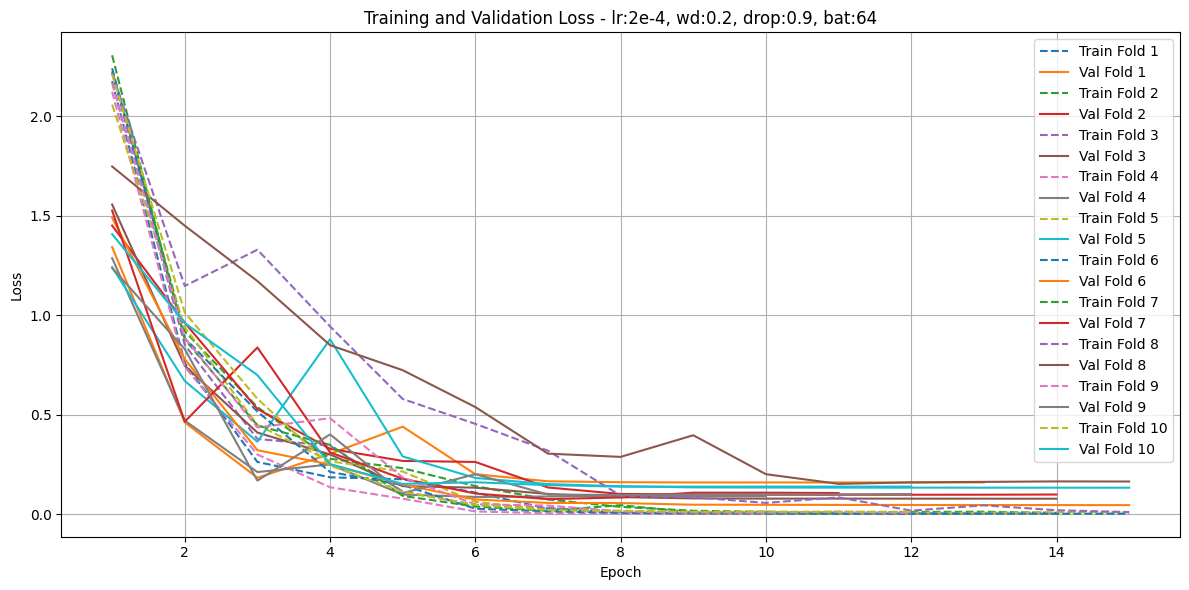

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for fold in df_results["fold"].unique():
    fold_data = df_results[df_results["fold"] == fold]
    plt.plot(fold_data["epoch"], fold_data["train_loss"], linestyle="--", label=f"Train Fold {fold}")
    plt.plot(fold_data["epoch"], fold_data["val_loss"], linestyle="-", label=f"Val Fold {fold}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss - lr:2e-4, wd:0.2, drop:0.9, bat:64")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
final_accuracies = df_results.groupby("fold")["val_accuracy"].last().tolist()
final_loss = df_results.groupby("fold")["val_loss"].last().tolist()
average_loss = df_results.groupby("fold")['val_loss'].last().mean()

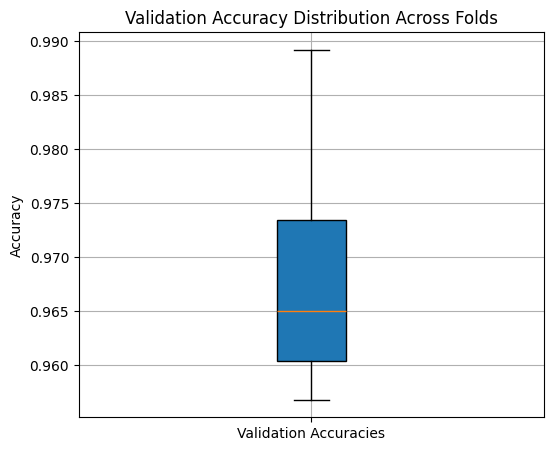

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(final_accuracies, vert=True, patch_artist=True)
plt.title("Validation Accuracy Distribution Across Folds")
plt.ylabel("Accuracy")
plt.xticks([1], ['Validation Accuracies'])
plt.grid(True)
plt.show()


In [ ]:
print(np.mean(final_accuracies))
print(final_loss)
print(average_loss)

0.968043159068429
[0.1612315389017264, 0.1002665994067986, 0.0792417203386624, 0.0918186251074075, 0.134454080214103, 0.0469732532898585, 0.1077886521816253, 0.1656496586898962, 0.1028176359832286, 0.1401271770397822]
0.11303689411530886
